# Correct the event-kinematics
for wrong $p_\mu$ reconstruction

In [4]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline
from scipy import stats

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [5]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/KinematicalReconstruction/'

In [7]:
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type]=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_'+pair_type+'.csv')
selected_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
selected_events=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_events.csv')
print len(pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])),'events in the overlay'
print len(selected_CC1p0pi),'selected CC 1p 0pi pairs in overlay'

9384 events in the overlay
7304 selected CC 1p 0pi pairs in overlay


In [8]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(overlay_tightFV),'events in the overlay'

print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

5294 events in the overlay
4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


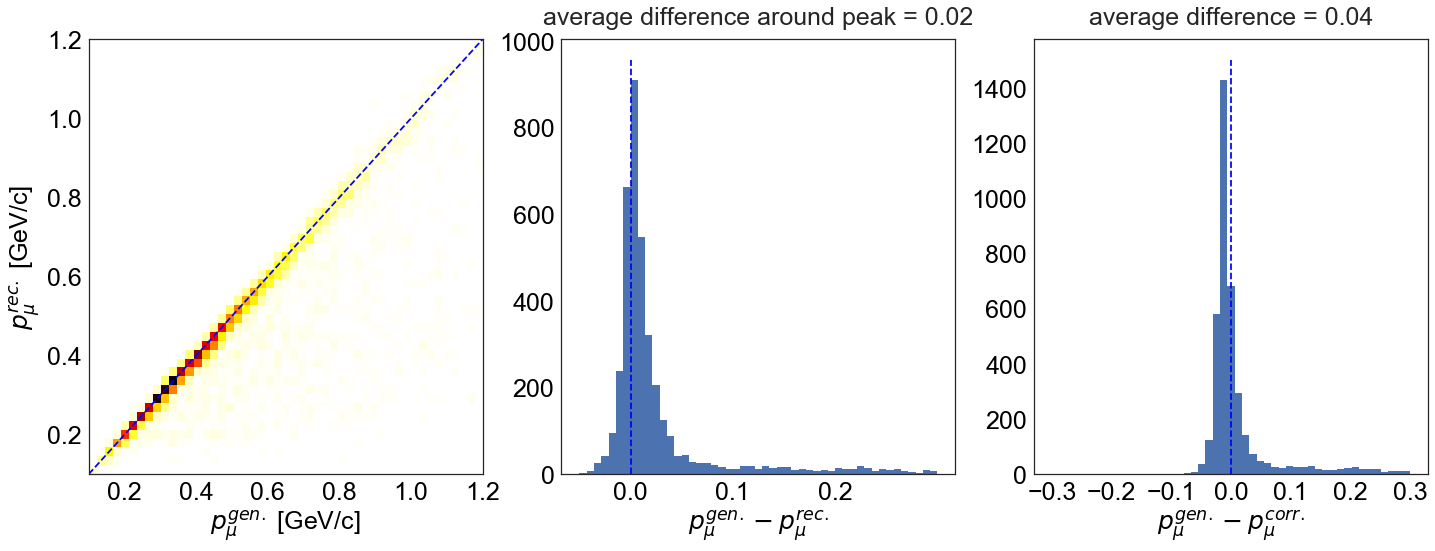

In [29]:
fig = plt.figure(figsize=(24,8))
sam = selected_CC1p0pi_tightFV
gen,rec = sam['truth_Pmu'],sam['reco_Pmu']

ax=fig.add_subplot(1,3,1)
plot_2d_hist(gen,rec,bins=linspace(0.1,1.2,50),ax=ax,xlabel=r'$p_\mu^{gen.}$ [GeV/c]',ylabel=r'$p_\mu^{rec.}$ [GeV/c]');
plt.plot([0.1,1.2],[0.1,1.2],'--',color='blue')

ax=fig.add_subplot(1,3,2)
diff = gen - rec
plt.hist(diff,bins=linspace(-0.05,0.3,50));
plt.plot([0,0],ax.get_ylim(),'--',color='blue')
mean = np.mean(diff)
truncated = diff[np.abs(diff)<0.2]
trun_diff = np.mean(truncated)
set_axes(ax,x_label=r'$p_\mu^{gen.}-p_\mu^{rec.}$',y_label='',title='average difference around peak = %.2f'%trun_diff,xticks=(0.,0.1,0.2))


sam['corrected_Pmu'] = sam['reco_Pmu'] + trun_diff
corr = sam['corrected_Pmu']
ax=fig.add_subplot(1,3,3)
diff = gen - corr
plt.hist(diff,bins=linspace(-0.3,0.3,50));
plt.plot([0,0],ax.get_ylim(),'--',color='blue')
mean = np.mean(diff)
set_axes(ax,x_label=r'$p_\mu^{gen.}-p_\mu^{corr.}$',y_label='',title='average difference = %.2f'%mean)


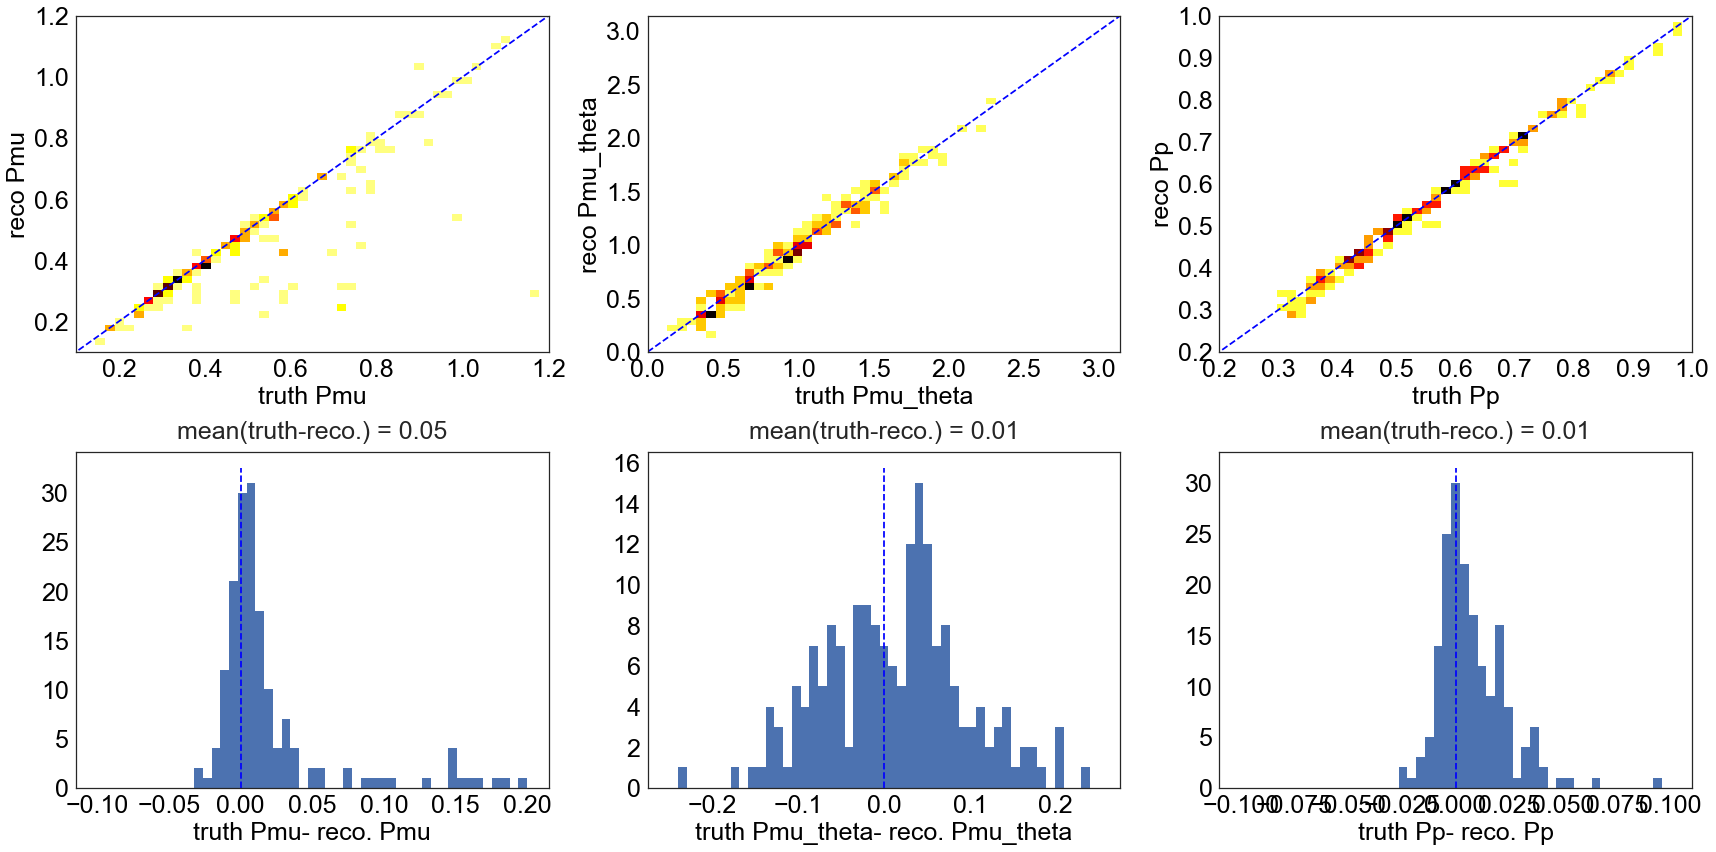

In [20]:
fig = plt.figure(figsize=(24,12))
for i,(var,bins,xlim) in enumerate(zip(['Pmu','Pmu_theta','Pp']
                                  ,[linspace(0.1,1.2,50),linspace(0,np.pi,50),linspace(0.2,1,50)]
                                       ,[(-0.1,0.2),(-0.25,0.25),(-0.1,0.1)])):
    ax=fig.add_subplot(2,3,i+1)
    plot_2d_hist(quasidata['truth_'+var],quasidata['reco_'+var],bins=bins,ax=ax
                 ,xlabel='truth '+var,ylabel='reco '+var);
    plt.plot([0,np.max(bins)],[0,np.max(bins)],'--',color='blue')
    
    ax=fig.add_subplot(2,3,i+4)
    plt.hist(quasidata['truth_'+var]-quasidata['reco_'+var],bins=linspace(xlim[0],xlim[1],50));
    plt.plot([0,0],ax.get_ylim(),'--',color='blue')
    mean = np.mean(quasidata['truth_'+var]-quasidata['reco_'+var])    
    set_axes(ax,x_label=('truth '+var+'- reco. ' +var),y_label=''
             ,title='mean(truth-reco.) = %.2f'%mean)



plt.tight_layout()

0.0496538688853
0.0571586578248
0.00811108120079
0.012053167003


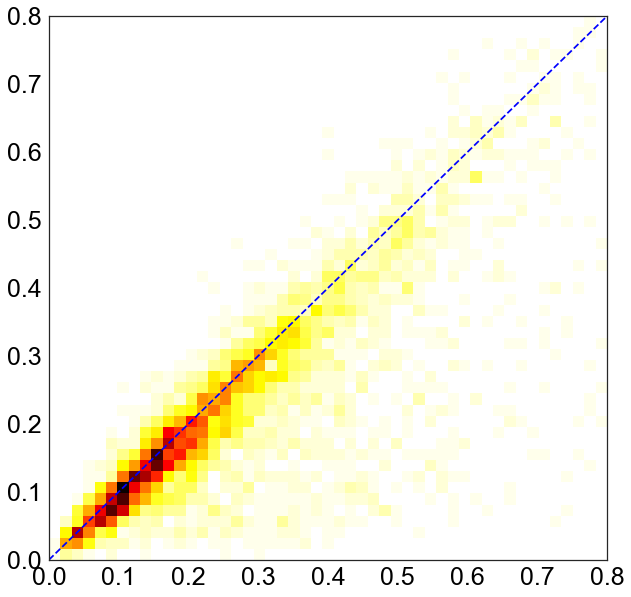

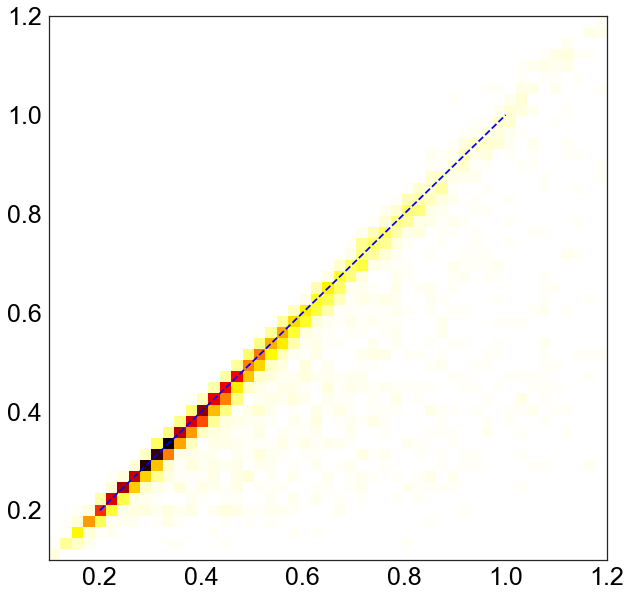

In [21]:
plot_2d_hist(selected_CC1p0pi_tightFV['closest_genie_Q2'],selected_CC1p0pi_tightFV['reco_Q2'],bins=linspace(0.,.8,50));
mean = np.mean(selected_CC1p0pi_tightFV['closest_genie_Q2']-selected_CC1p0pi_tightFV['reco_Q2'])    
print mean
plt.plot([0,0.8],[0,0.8],'--',color='blue')

plot_2d_hist(selected_CC1p0pi_tightFV['truth_Pmu'],selected_CC1p0pi_tightFV['reco_Pmu'],bins=linspace(0.1,1.2,50));
mean = np.mean(selected_CC1p0pi_tightFV['truth_Pmu']-selected_CC1p0pi_tightFV['reco_Pmu'])    
print mean
plt.plot([0.2,1],[0.2,1],'--',color='blue')


mean = np.mean(selected_CC1p0pi_tightFV['truth_Pp']-selected_CC1p0pi_tightFV['reco_Pp'])    
print mean

mean = np.mean(selected_CC1p0pi_tightFV['truth_Pmu_theta']-selected_CC1p0pi_tightFV['reco_Pmu_theta'])    
print mean



In [39]:
def pow_func(x, a, b, c):
    return a*np.power(x,b) + c

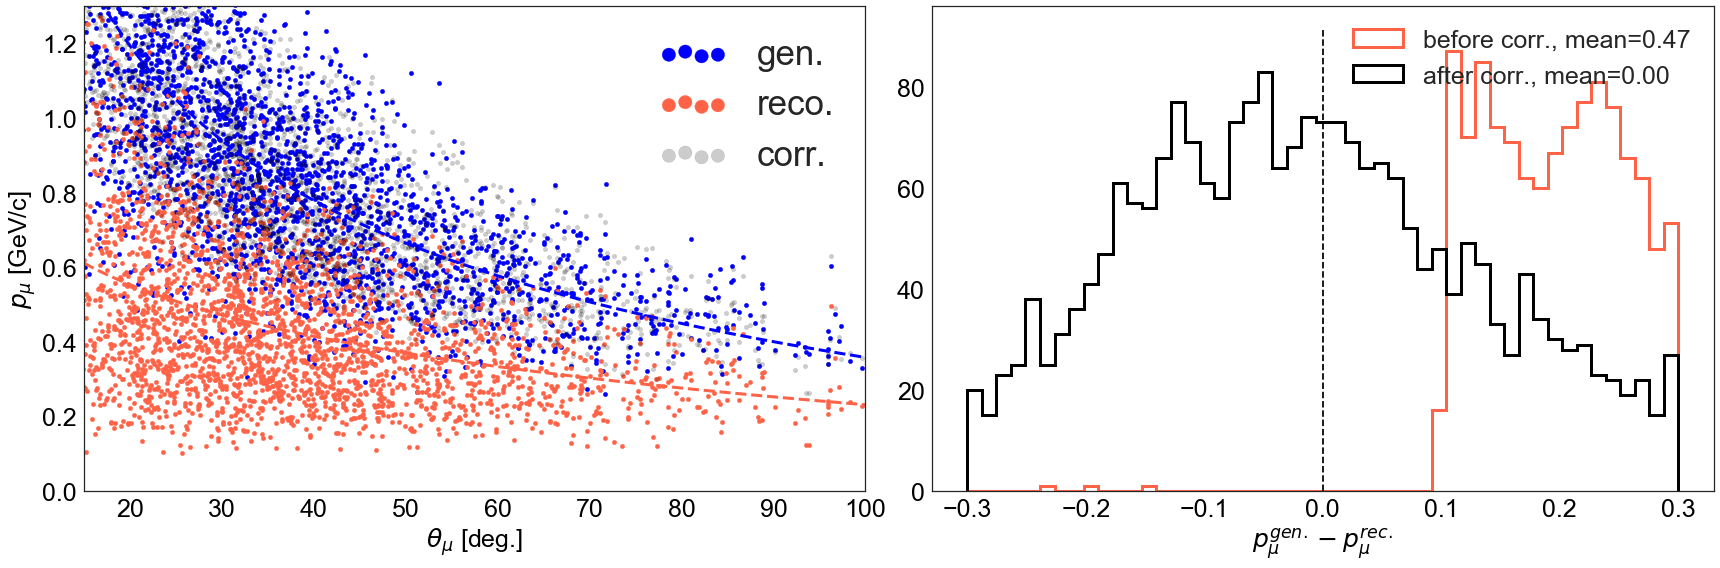

In [88]:
fig=plt.figure(figsize=(24,8))

# correction procedure
ax=fig.add_subplot(1,2,1)
theta_min = 15
theta_max = 100
sam = selected_CC1p0pi
# sam = sam[(180./np.pi*sam['reco_Pmu_theta']>theta_min)&(180./np.pi*sam['reco_Pmu_theta']<theta_max)]
sam = sam[np.abs(sam['truth_Pmu']-sam['reco_Pmu'])>0.1]

x = 180./np.pi*sam['reco_Pmu_theta']
x_fit = linspace(theta_min ,theta_max, 100)
y_reco = sam['reco_Pmu']
y_true = sam['truth_Pmu']

set_axes(ax,r'$\theta_\mu$ [deg.]',r'$p_\mu$ [GeV/c]',xlim=(theta_min ,theta_max),ylim=(0,1.3))

popt=dict()
for y,color,ylabel in zip([y_true,y_reco]
                          ,['blue','tomato']
                          ,['gen.','reco.']):
    plt.scatter(x,y,color=color,s=20,label=ylabel)
    popt[ylabel], pcov = curve_fit(pow_func, x, y , (1,-0.5,0), maxfev=5000)
    plt.plot(x_fit, pow_func(x_fit, *popt[ylabel]), '--', c=color,linewidth=3)
    
y_corr = y_reco + pow_func(x, *popt['gen.']) - pow_func(x, *popt['reco.'])
# y_corr = y_reco * pow_func(x, *popt['gen.']) / pow_func(x, *popt['reco.'])
# y_corr = pow_func(x, *popt['gen.'])
plt.scatter(x,y_corr,color='black',s=20,label='corr.',alpha=0.2)
popt['corr.'], pcov = curve_fit(pow_func, x, y_corr , (1,-0.5,0), maxfev=5000)
ax.legend(fontsize=35 , markerscale=3., scatterpoints=4 )




# correction result
ax=fig.add_subplot(1,2,2)
bins=linspace(-0.3,0.3,50)
plt.hist(y_true-y_reco,bins=bins,histtype='step',linewidth=3,color='tomato'
         ,label='before corr., mean=%.2f'%np.mean(y_true-y_reco))
plt.hist(y_true-y_corr,bins=bins,histtype='step',linewidth=3,color='black'
         ,label='after corr., mean=%.2f'%np.mean(y_true-y_corr))

plt.plot([0,0],ax.get_ylim(),'--',color='black')    
set_axes(ax,r'$p^{gen.}_{\mu}-p^{rec.}_{\mu}$',do_add_legend=True)


plt.tight_layout()

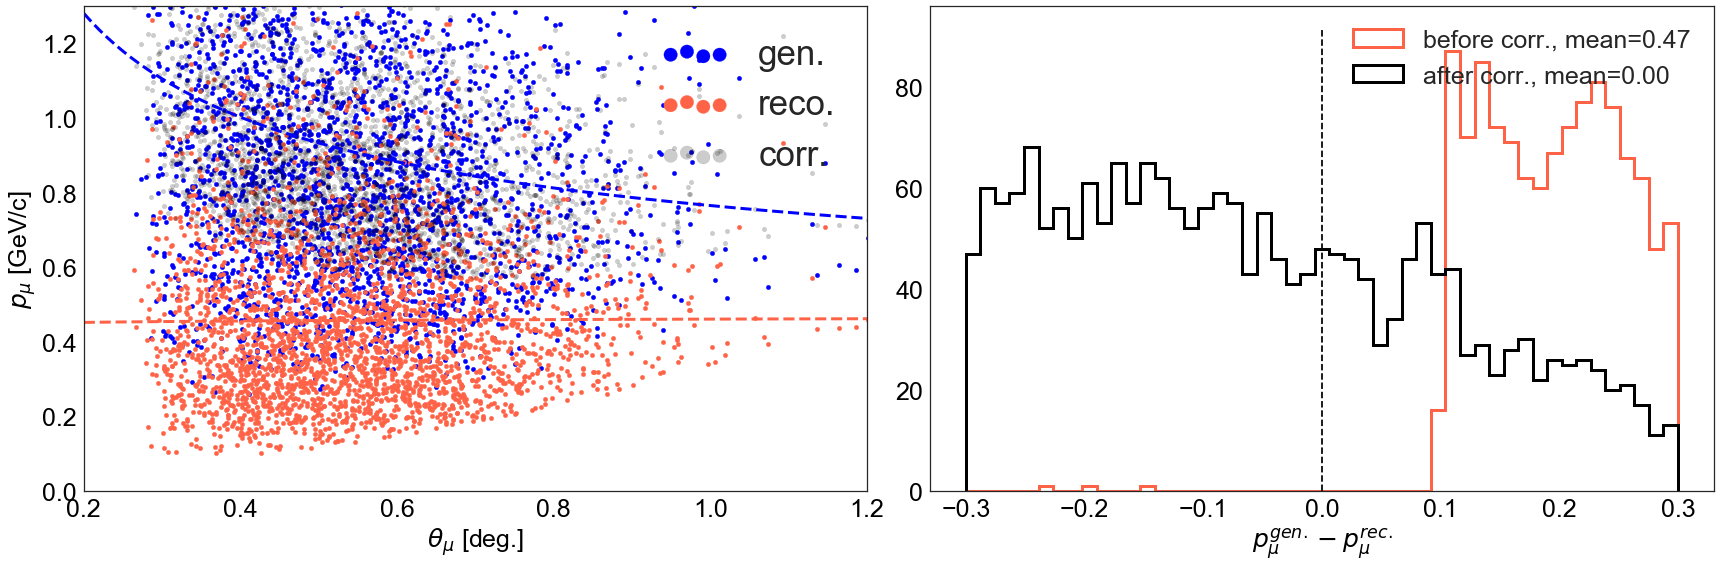

In [90]:
fig=plt.figure(figsize=(24,8))

# correction procedure
ax=fig.add_subplot(1,2,1)
Pp_min = 0.2
Pp_max = 1.2
sam = selected_CC1p0pi
sam = sam[np.abs(sam['truth_Pmu']-sam['reco_Pmu'])>0.1]

x = sam['reco_Pp']
x_fit = linspace(Pp_min ,Pp_max, 100)
y_true = sam['truth_Pmu']
y_reco = sam['reco_Pmu']


popt=dict()
for y,color,ylabel in zip([y_true,y_reco]
                          ,['blue','tomato']
                          ,['gen.','reco.']):
    plt.scatter(x,y,color=color,s=20,label=ylabel)
    popt[ylabel], pcov = curve_fit(pow_func, x, y , (1,-0.5,0), maxfev=5000)
    plt.plot(x_fit, pow_func(x_fit, *popt[ylabel]), '--', c=color,linewidth=3)
    
y_corr = y_reco + pow_func(x, *popt['gen.']) - pow_func(x, *popt['reco.'])
# y_corr = y_reco * pow_func(x, *popt['gen.']) / pow_func(x, *popt['reco.'])
# y_corr = pow_func(x, *popt['gen.'])
plt.scatter(x,y_corr,color='black',s=20,label='corr.',alpha=0.2)
popt['corr.'], pcov = curve_fit(pow_func, x, y_corr , (1,-0.5,0), maxfev=5000)
set_axes(ax,r'$\theta_\mu$ [deg.]',r'$p_\mu$ [GeV/c]',xlim=(Pp_min ,Pp_max),ylim=(0,1.3))
ax.legend(fontsize=35 , markerscale=3., scatterpoints=4 )




# correction result
ax=fig.add_subplot(1,2,2)
bins=linspace(-0.3,0.3,50)
plt.hist(y_true-y_reco,bins=bins,histtype='step',linewidth=3,color='tomato'
         ,label='before corr., mean=%.2f'%np.mean(y_true-y_reco))
plt.hist(y_true-y_corr,bins=bins,histtype='step',linewidth=3,color='black'
         ,label='after corr., mean=%.2f'%np.mean(y_true-y_corr))

plt.plot([0,0],ax.get_ylim(),'--',color='black')    
set_axes(ax,r'$p^{gen.}_{\mu}-p^{rec.}_{\mu}$',do_add_legend=True)


plt.tight_layout()

In [ ]:
# What is the difference between the well reconstructed $Q^2$ and poorly reconstructed $Q^2$

done.


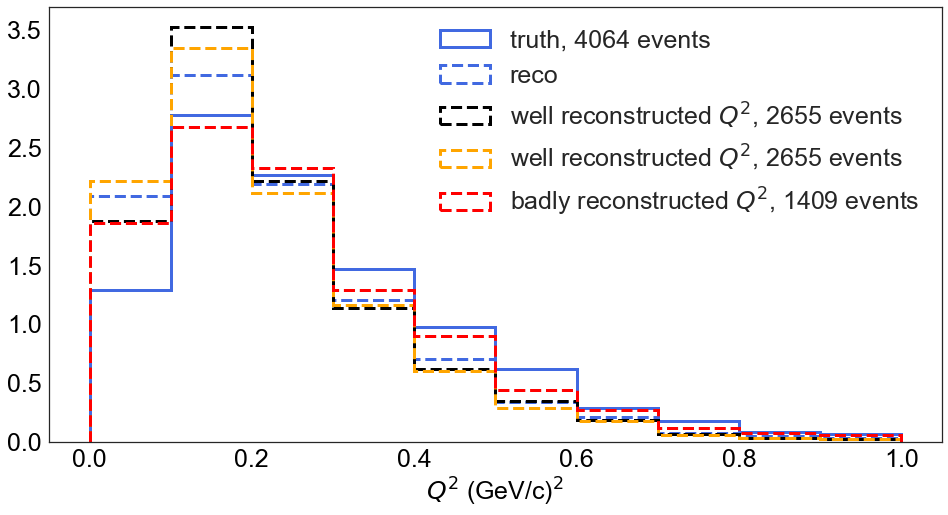

In [97]:
sam = selected_CC1p0pi_tightFV
bins=linspace(0,1,11)
fig,ax=plt.subplots(figsize=(16,8));
plt.hist(np.array(sam['truth_Q2']),bins=bins,normed=1,label='truth, %d events'%len(sam),histtype='step',linewidth=3,color='royalblue',linestyle='-')
plt.hist(np.array(sam['reco_Q2']),bins=bins,normed=1,label='reco',histtype='step',linewidth=3,color='royalblue',linestyle='--')
sam_good_Q2 = sam[np.abs(sam['reco_Q2']-sam['truth_Q2'])<0.05]
sam_bad_Q2 = sam[np.abs(sam['reco_Q2']-sam['truth_Q2'])>0.05]
plt.hist(np.array(sam_good_Q2['truth_Q2']),bins=bins,normed=1,label='well reconstructed $Q^2$, %d events'%len(sam_good_Q2),histtype='step',linewidth=3,color='black',linestyle='--')
plt.hist(np.array(sam_good_Q2['reco_Q2']),bins=bins,normed=1,label='well reconstructed $Q^2$, %d events'%len(sam_good_Q2),histtype='step',linewidth=3,color='orange',linestyle='--')
plt.hist(np.array(sam_bad_Q2['reco_Q2']),bins=bins,normed=1,label='badly reconstructed $Q^2$, %d events'%len(sam_bad_Q2),histtype='step',linewidth=3,color='red',linestyle='--')

set_axes(ax,r'$Q^2$ (GeV/c)$^2$','',do_add_legend=True)
print 'done.'